In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cmath
%matplotlib inline 

In [2]:
time1 = np.array([0.1 * i for i in range(100)])
exp1 = np.exp(-1 * time1)

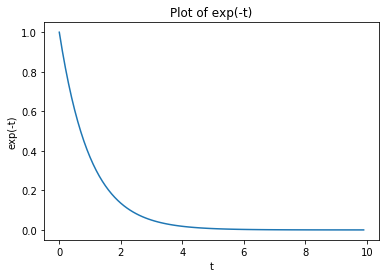

In [3]:
plt.plot(time1, exp1)
plt.title('Plot of exp(-t)')
plt.xlabel('t')
plt.ylabel('exp(-t)')
plt.show()

# Function for Approximating Fourier Transform

In [4]:
def FT_exp(freq, time, exp):
    assert isinstance(freq, np.ndarray)
    ft_result = np.zeros(freq.shape, dtype=complex)
    for l in range(len(freq)):
        s = 0
        for k in range(2, len(time)):
            s += ((exp[k] - exp[k-1]) / (time[k] - time[k-1])) * (cmath.exp(-1j*freq[l]*time[k-1]) - cmath.exp(-1j*freq[l]*time[k]))
        ftexp = - (freq[l] * 1j + (1 - cmath.exp(- 1j * freq[l] * time[1])) * (exp[1] - 1) / time[1] + s) / freq[l]**2
        ft_result[l] = ftexp
    return ft_result

In [5]:
test_freq = np.array([0.1 * w for w in range(1, 1001)]) #test frequency range 0.1 to 100
ft_exp = FT_exp(test_freq, time1, exp1)

# Real FT Function

In [6]:
def real_ft_exp(freq):
    return (1 - 1j * freq) / (1 + freq ** 2)

# Result Comparison

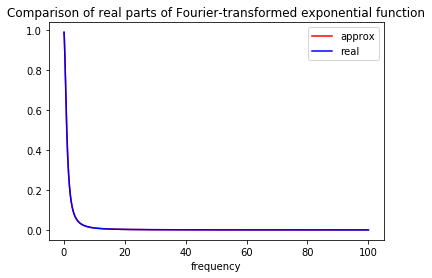

In [7]:
plt.plot(test_freq, ft_exp.real, 'r', label = 'approx')
plt.plot(test_freq, real_ft_exp(test_freq).real, 'b', label = 'real')
plt.title('Comparison of real parts of Fourier-transformed exponential function')
plt.xlabel('frequency')
plt.legend()
plt.show()

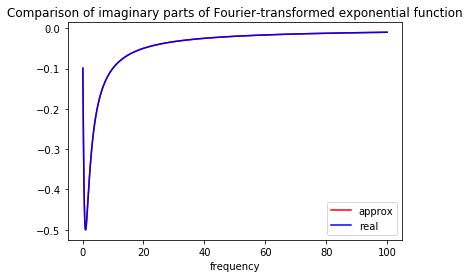

In [8]:
plt.plot(test_freq, ft_exp.imag, 'r', label = 'approx')
plt.plot(test_freq, real_ft_exp(test_freq).imag, 'b', label = 'real')
plt.title('Comparison of imaginary parts of Fourier-transformed exponential function')
plt.xlabel('frequency')
plt.legend()
plt.show()

# Result Comparison after Multiplying by iw

In [9]:
# test frequency is increased considerably since we are working with log scale
# range is now [0.1, 1000]

test_freq_iw = np.array([0.1 * w for w in range(1, 10001)])
ft_exp_iw = FT_exp(test_freq_iw, time1, exp1)

In [10]:
ft_exp_iw = np.multiply(ft_exp_iw, test_freq_iw) * 1j
real_ft_exp_iw = np.multiply(real_ft_exp(test_freq_iw), test_freq_iw) * 1j

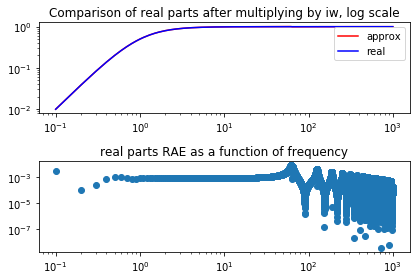

In [11]:
plt.figure()

plt.subplot(211)
plt.loglog(test_freq_iw, ft_exp_iw.real, 'r', label = 'approx')
plt.loglog(test_freq_iw, real_ft_exp_iw.real, 'b', label = 'real')
plt.title('Comparison of real parts after multiplying by iw, log scale')
plt.legend()

plt.subplot(212)
plt.loglog(test_freq_iw, np.absolute((ft_exp_iw.real- real_ft_exp_iw.real)/ real_ft_exp_iw.real), ls='', marker='o')
plt.title('real parts RAE as a function of frequency')

plt.tight_layout()
plt.show()

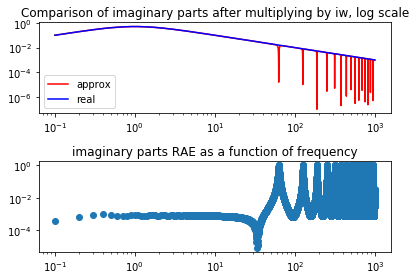

In [12]:
plt.figure()

plt.subplot(211)
plt.loglog(test_freq_iw, ft_exp_iw.imag, 'r', label = 'approx')
plt.loglog(test_freq_iw, real_ft_exp_iw.imag, 'b', label = 'real')
plt.title('Comparison of imaginary parts after multiplying by iw, log scale')
plt.legend()

plt.subplot(212)
plt.loglog(test_freq_iw, np.absolute((ft_exp_iw.imag- real_ft_exp_iw.imag)/ real_ft_exp_iw.imag), ls='', marker='o')
plt.title('imaginary parts RAE as a function of frequency')

plt.tight_layout()
plt.show()

# Can Oversampling Fix This Problem?

In [13]:
# time difference between two points is now 0.01 instead of 0.1
# time range is still [0, 10)
# same test frequency [0.1, 1000]

time2 = np.array([0.01 * i for i in range(1000)])
exp2 = np.exp(-1 * time2)
ft_exp_2_iw = FT_exp(test_freq_iw, time2, exp2)
ft_exp_2_iw = np.multiply(ft_exp_2_iw, test_freq_iw) * 1j

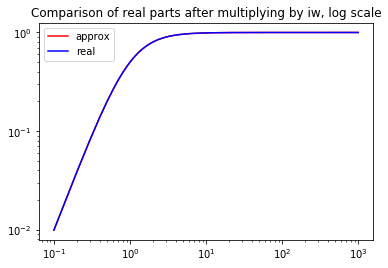

In [14]:
plt.loglog(test_freq_iw, ft_exp_2_iw.real, 'r', label = 'approx')
plt.loglog(test_freq_iw, real_ft_exp_iw.real, 'b', label = 'real')
plt.title('Comparison of real parts after multiplying by iw, log scale')
plt.legend()
plt.show()

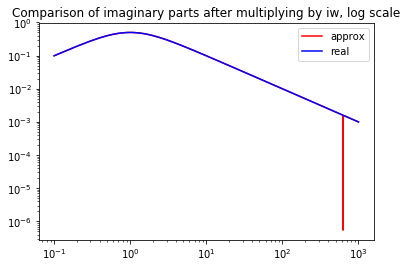

In [15]:
plt.loglog(test_freq_iw, ft_exp_2_iw.imag, 'r', label = 'approx')
plt.loglog(test_freq_iw, real_ft_exp_iw.imag, 'b', label = 'real')
plt.title('Comparison of imaginary parts after multiplying by iw, log scale')
plt.legend()
plt.show()

# Oversample with Cubic Spline Interpolation

In [16]:
# Use cubic spline interpolation to oversample first set of data
# where time increment is 0.1

from scipy.interpolate import CubicSpline

cs_interpolator = CubicSpline(time1, exp1)

In [17]:
# To get information up to 1000 Hz, sampling frequency need to be at least 2000 Hz ?

time3 = np.arange(0,10,0.0005)
interpolated_exp3 = cs_interpolator(time3)

In [18]:
ft_exp_3_iw = FT_exp(test_freq_iw, time3, interpolated_exp3)
ft_exp_3_iw = np.multiply(ft_exp_3_iw, test_freq_iw) * 1j

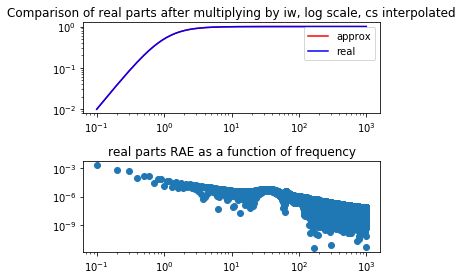

In [19]:
plt.figure()

plt.subplot(211)
plt.loglog(test_freq_iw, ft_exp_3_iw.real, 'r', label = 'approx')
plt.loglog(test_freq_iw, real_ft_exp_iw.real, 'b', label = 'real')
plt.title('Comparison of real parts after multiplying by iw, log scale, cs interpolated')
plt.legend()

plt.subplot(212)
plt.loglog(test_freq_iw, np.absolute((ft_exp_3_iw.real- real_ft_exp_iw.real)/ real_ft_exp_iw.real), ls='', marker='o')
plt.title('real parts RAE as a function of frequency')

plt.tight_layout()
plt.show()

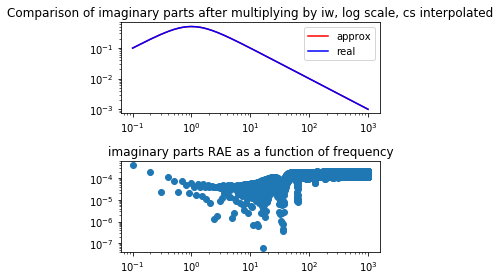

In [20]:
plt.figure()

plt.subplot(211)
plt.loglog(test_freq_iw, ft_exp_3_iw.imag, 'r', label = 'approx')
plt.loglog(test_freq_iw, real_ft_exp_iw.imag, 'b', label = 'real')
plt.title('Comparison of imaginary parts after multiplying by iw, log scale, cs interpolated')
plt.legend()

plt.subplot(212)
plt.loglog(test_freq_iw, np.absolute((ft_exp_3_iw.imag- real_ft_exp_iw.imag)/ real_ft_exp_iw.imag), ls='', marker='o')
plt.title('imaginary parts RAE as a function of frequency')

plt.tight_layout()
plt.show()